In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

from DEN import DENlayer
from DMN import DMNlayer
from DSN import DSNlayer




from PreTrain.HpC import HSpC
from PreTrain.HpC import HEpC
from PreTrain.HpC import HBpC

from PreTrain.kmeans import bkmeans
from PreTrain.kmeans import ekmeans
from PreTrain.kmeans import skmeans

#HEpC, HSpC

#from PreTrain.kmeans import bkmeans, ekmeans, skmeans

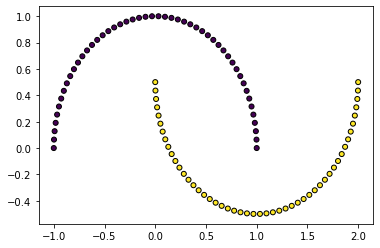

In [2]:
x,y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
x=x*1


fig, ax = plt.subplots()

ax.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


plt.show()


In [3]:
#y=[0,0,1,0,0]
unidades=3
dendrites  = HBpC.HBpC(x,y,0.0001)
dendrites  = HEpC.HEpC(x,y)
dendrites  = HSpC.HSpC(x,y,0.0001)
dendrites  = bkmeans.bkmeans(x,y,[3,3,3],0.01)
dendrites  = ekmeans.ekmeans(x,y,[3])
dendrites  = skmeans.skmeans(x,y,[2],0.01)



Clusters n [0 1 2]
clusters [[ 1.22252093 -0.47492791]
 [ 1.34536505 -0.43846842]
 [ 0.77747907 -0.47492791]
 [ 1.03205158 -0.49948622]
 [ 0.53746171 -0.38659931]
 [ 1.46253829 -0.38659931]
 [ 0.96794842 -0.49948622]
 [ 0.71547241 -0.45866785]
 [ 1.40478334 -0.41441262]
 [ 0.8404001  -0.48718178]
 [ 1.1595999  -0.48718178]
 [ 1.09602303 -0.49537911]
 [ 1.28452759 -0.45866785]
 [ 0.48160743 -0.35514276]
 [ 0.90397697 -0.49537911]
 [ 0.59521666 -0.41441262]
 [ 0.65463495 -0.43846842]]
Dimensiones 2
clusters [[ 0.3765102  -0.28183148]
 [ 0.00205461  0.43592978]
 [ 0.07308324  0.124733  ]
 [ 0.42788334 -0.32017225]
 [ 0.05094425  0.18489178]
 [ 0.03270514  0.24634542]
 [ 0.09903113  0.06611626]
 [ 0.28165065 -0.19568255]
 [ 0.1286813   0.00928245]
 [ 0.23855404 -0.1482284 ]
 [ 0.32769911 -0.240278  ]
 [ 0.00820999  0.37212284]
 [ 0.1619119  -0.0455349 ]
 [ 0.19858638 -0.09811053]
 [ 0.          0.5       ]
 [ 0.01844084  0.30884137]]
Dimensiones 2
clusters [[ 1.96729486  0.24634542]
 [ 1.6

In [10]:
len(dendrites[0])
print(y)
dendrites

[1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1]


([-1.0001, -0.0001], [1.0001, 0.9995862162006879])

In [ ]:


def TestModel():  
   model = Sequential()
   model.add(DENlayer(2,dendrites, activation = "sigmoid", input_shape = (np.shape(x)[1],)))
   #model.add(Dense(3, activation = 'relu' ))
   model.add(Dense(1)) 
   return model

model = TestModel()
model.summary()
model.compile(optimizer = optimizers.RMSprop(lr = 0.05),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


In [ ]:
history = model.fit(x, y,
                     epochs = 10,
                     batch_size = 128)

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y, clf=model, legend=2)
print(model.weights)


In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y, clf=model, legend=2)
print(model.weights)


In [ ]:
# Decision Boundary
h = 0.02
scale = 10
x_min, x_max = x[:, 0].min() - scale, x[:, 0].max() + scale
y_min, y_max = x[:, 1].min() - scale, x[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)

out = (out >= 0.5).astype(int)
out = out.reshape(xx.shape)

plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
h = 0.02
scale = 1
x_min, x_max = x[:, 0].min() - scale, x[:, 0].max() + scale
y_min, y_max = x[:, 1].min() - scale, x[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)

out = (out <= 0.5).astype(int)
out = out.reshape(xx.shape)

plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

Xb, yb = make_blobs(n_samples=300, centers=3, n_features=2,
                  random_state=0)

Yb = to_categorical(yb)
#Yb = Yb[:,1:] 
#print(Yb)



fig, ax = plt.subplots()

ax.scatter(Xb[:, 0], Xb[:, 1], marker='o', c=yb,
            s=25, edgecolor='k')

plt.show()

In [ ]:
print(len(yb))
#dendrites = HBpC(Xb,yb)
#dendrites = HEpC(Xb,yb)
dendrites = HSpC.HSpC(Xb,yb)
#dendrites = bkmeans(Xb,yb,[3,3,3])
#dendrites = ekmeans(Xb,yb,[5,5,5])
#dendrites = skmeans(Xb,yb,[5,5,5])

print(dendrites)


In [ ]:
dendrites[0].shape

In [ ]:
def TestModel():  
   model = Sequential()
   model.add(DSNlayer(40, dendrites,activation='relu', input_shape = (np.shape(Xb)[1],)))
   
   #model.add(DENlayer(6, activation = 'sigmoid' ))
   model.add(Dense(3, activation = 'softmax')) 
   return model

#yb =  to_categorical(yb, dtype ="uint8") 

model = TestModel()
model.summary()
model.compile(optimizer = optimizers.RMSprop(lr = 0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])



In [ ]:
history = model.fit(Xb, Yb,
                    epochs = 2000,
                    batch_size = 128)


In [ ]:
# Decision Boundary
h = 0.02
scale = 1
x_min, x_max = Xb[:, 0].min() - scale, Xb[:, 0].max() + scale
y_min, y_max = Xb[:, 1].min() - scale, Xb[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)
print(out.shape)

print(type(out))
out2 = np.zeros(out.shape[0])

for n in range(out.shape[0]):
    out2[n] = np.argmax(out[n])
          
    
print((out2))
out2 = out2.reshape(xx.shape)

#out = (out >= 0.5).astype(int)
#out = out.reshape(xx.shape)

plt.contourf(xx, yy, out2)
plt.scatter(Xb[:, 0], Xb[:, 1], c = yb)
plt.xlabel('x1')
plt.ylabel('x2')